In [1]:
#SET UP

#import libraries
import pandas as pd
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import helper
import imp
#set up path
import os
PATH = os.getcwd()

/tmp/ipykernel_206971/426597402.py:9: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


## Carrot Dataset

### Load images

In [2]:
data = np.zeros((200,224*224*3), dtype = int)

#load 200 carrot images
for i in range(1,201):
    file_link = PATH + f'/dataset/Carrot/1{i:03}.jpg'.format(i)
    im = Image.open(file_link)
    a = np.asarray(im)
    data[i-1,:] = a.reshape(224*224*3)
    if i % 50 == 0:
        print("Successfully load {} images".format(i))

Successfully load 50 images
Successfully load 100 images
Successfully load 150 images
Successfully load 200 images


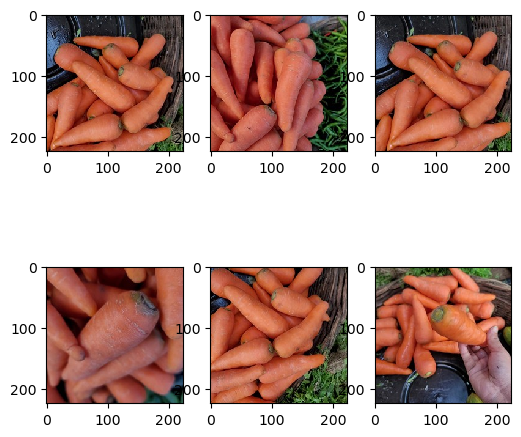

In [3]:
#take a look at some images

_, axs = plt.subplots(2, 3, figsize=(6, 6))
axs = axs.flatten()
for img, ax in zip(data, axs):
    img = img.reshape(224,224,3)
    ax.imshow(img)
plt.show()

### Choosing representative images
for every 50 images, choose 4

In [4]:
k_means = helper.my_k_means(k = 4)
centers_rep, num_iters_rep, current_mse_rep, clusters_rep = k_means.fit(data)
representatives = k_means.closest_to_clusters()

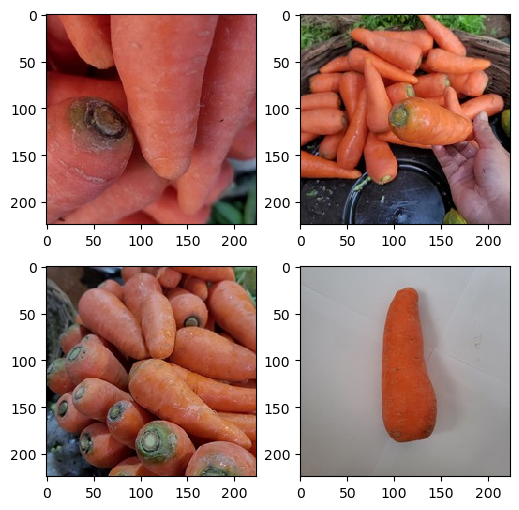

In [5]:
_, axs = plt.subplots(2, 2, figsize=(6, 6))
axs = axs.flatten()
for img, ax in zip(data[representatives], axs):
    img = img.reshape(224,224,3)
    ax.imshow(img)
plt.show()

### Vector Quantization on representative images

In [30]:
compressed_rep_imgs, rep_vqs = helper.compress_rep_im(data[representatives], 224, 224, 36)


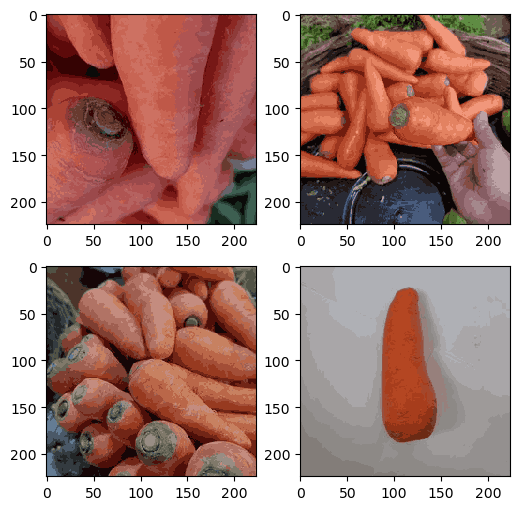

In [14]:
_, axs = plt.subplots(2, 2, figsize=(6, 6))
axs = axs.flatten()
for img, ax in zip(compressed_rep_imgs, axs):
    img = img.reshape(224,224,3)
    ax.imshow(img)
plt.show()

In [ ]:
# Create a plot with colored rectangles for each RGB value
center_color = rep_vqs[0]['centers']/255
fig, ax = plt.subplots()
for i in range(len(center_color)):
    rect = plt.Rectangle((i, 0), 1, 1, color=center_color[i])
    ax.add_patch(rect)

# Set the plot limits and display the plot
plt.xlim((0, len(center_color)))
plt.ylim((0, 1))
plt.show()

### Apply vector quantization on other images

In [18]:
compressed_data = helper.compressed_other_imgs(data, clusters_rep, centers_rep, rep_vqs, 224, 224)

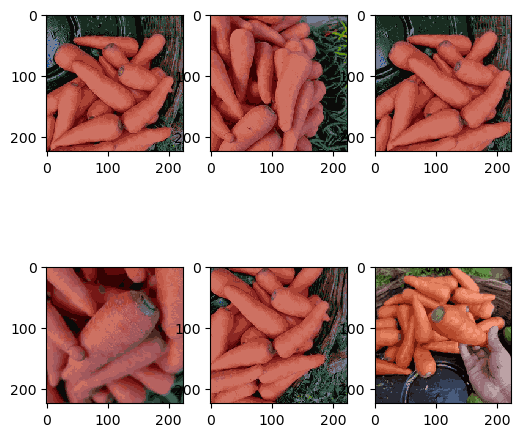

In [19]:
_, axs = plt.subplots(2, 3, figsize=(6, 6))
axs = axs.flatten()
for img, ax in zip(compressed_data, axs):
    img = img.reshape(224,224,3)
    ax.imshow(img)
plt.show()

### Image Quality Metrics

In [21]:
carrot_mse_arr = helper.mean_squared_error(data, compressed_data)

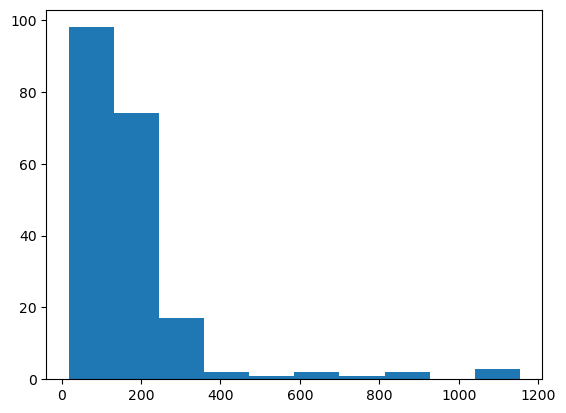

In [22]:
plt.hist(carrot_mse_arr)
plt.title('Histogram of MSE between images and compressed images')
plt.xlabel('MSE')
plt.ylabel('Count')
plt.show()

In [23]:
round(np.median(carrot_mse_arr),2)

134.20282937393708

Since the distribution is skewed, we use median instead of mean to represent the effect

### Try different k

In [42]:
imp.reload(helper)

<module 'helper' from '/Volumes/Users/ly_k1/Documents/CS339/k-means/image-compression/helper.py'>

In [43]:
helper.vq_on_diff_k([24,36], data ,img_width = 224, img_height = 224)

[168.50430816857994, 134.20282937393708]